# Final Exam ENGR 492
**Author:** Andre Cox

**Student ID:** 95076758

## Design Problem 
Design Problem, determine the shape of a vertical bar that will
experience a uniform axial stress, or an axial stress that increases by 2 percent, 3 percent, 5
percent, or 10 percent along its length, when the bar is hanging under its own weight and an axial
force P.

The bar has a varying cross-sectional area A(x), where:
- x = 0 is the bottom of the bar
- x = L is the top attachment
- A(x) is the unknown shape you must determine

You must evaluate the following stress distributions:
1. Uniform axial stress
2. Stress increasing by 2 percent from bottom to top
3. Stress increasing by 3 percent
4. Stress increasing by 5 percent
5. Stress increasing by 10 percent

Next, approximate the bar using disk elements. Use the following numbers of disks to investigate
how the numerical resolution affects the solution:
- 2 disks
- 10 disks
- 20 disks
- 100 disks
- 150 disks
- 500 disks

## Model Inputs
- P = 1000 N
- ρ = 8000 kg/m^3
- g = 9.81 m/s^2
- t = 0.2 m (thickness)
- W(0) = 0.5 m (width of the bar at x = 0)
- L = 1 m (bar length)

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Specify Constants and Inputs

In [17]:
P_applied_force = 1000 # Applied force in Newtons
p_density = 8000 # Density in kg/m^3
g_gravity = 9.81 # Gravity in m/s^2
w0_initial_width = 0.5 # Initial width in meters
t0_initial_thickness = 0.2 # Initial thickness in meters
L_length = 1.0 # Length in meters

### Create helper functions 
Create some helpers for area and stress

In [45]:
# these are python lambda functions they allow for quick one line functions
stress_from_area = lambda P, A: P / A
analytical_area = lambda x, A0, density, g, P: A0 * np.exp((A0* density * g * x) / P)

### Solving steps idea

1. Compute the weight of the first disk element at the bottom using initial width and dx
2. Compute the stress at the bottom using applied force and area, we save this as our reference stress
3. Use the weight of the first disk to add to the applied force to get the total force at the next disk
4. compute the area at the next disk to keep the stress the same as the reference stress
5. Continue the process up the bar length

### I create a function that computes the area distribution for a given number of section
This solves the problem using the steps outlined above

In [44]:
def compute_tapered_rod(P_applied_force, p_density, g_gravity, w0_initial_width, t0_initial_thickness, L_length, sections, alpha):
    dx = L_length / sections # length of each section
    x_positions = np.linspace(0, L_length, sections + 1) # Positions along the rod

    force = P_applied_force # initial force at the bottom
    # Lists created to store weights and areas of each section
    disk_weights = [] 
    areas = []

    # Setup the initial conditions for the bottom of the rod
    areas.append(w0_initial_width * t0_initial_thickness) # area at bottom
    reference_stress = stress_from_area(force, areas[-1]) # initial stress at bottom
    disk_weights.append(0)  # No weight at the bottom

    for i in range(1, sections + 1):
        # Step 1. Compute weight of previous disk
        disk_weight = p_density * g_gravity * areas[-1] * dx
        disk_weights.append(disk_weight) # disk weight from x_position[i-1] to x_position[i]

        # Step 2. Update force on current area
        force += disk_weight # force increases over rod length so we add

        # Step 3. Compute the area needed to maintain the reference stress
        area = force / reference_stress # compute area at position i
        areas.append(area) # store area at position i

        reference_stress *= (1 + alpha * dx)  # increase reference stress linearly

    return x_positions, areas, disk_weights


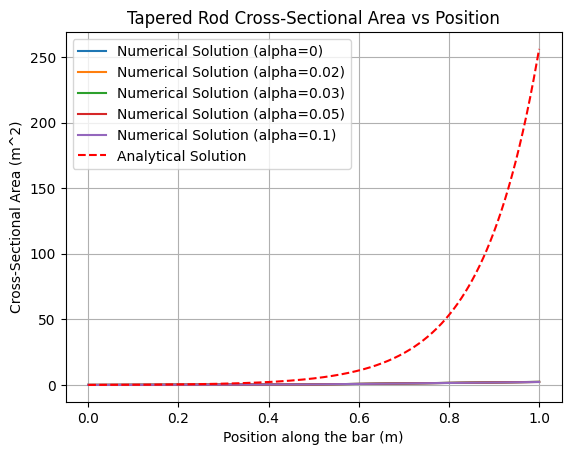

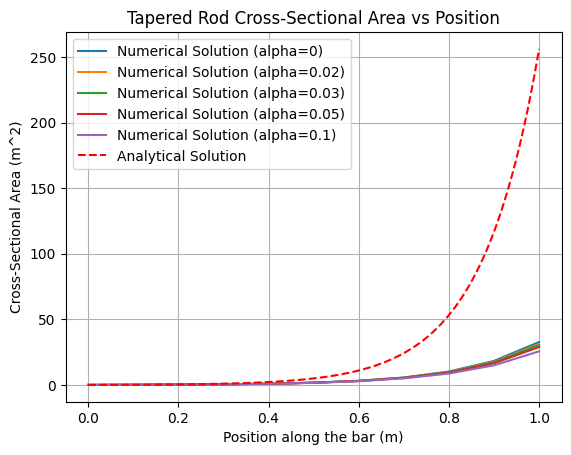

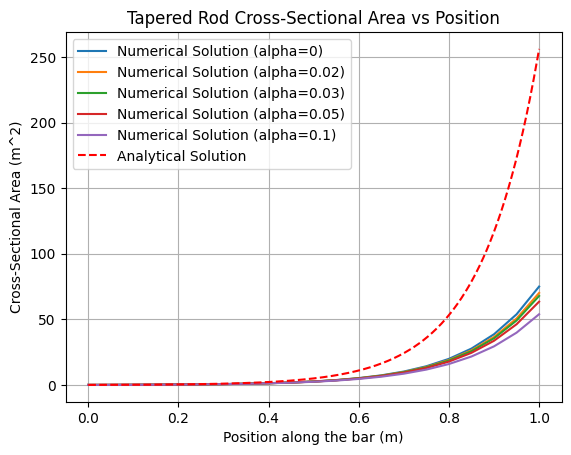

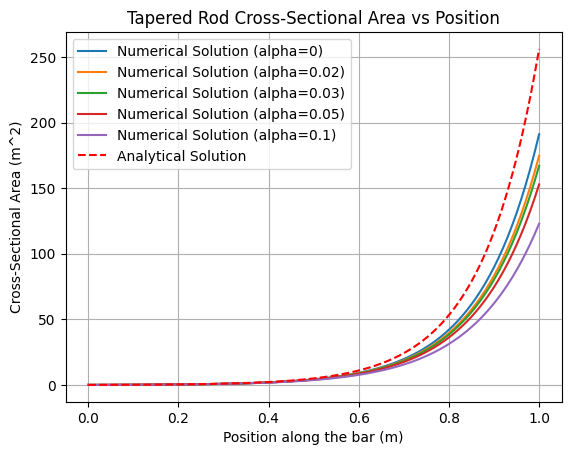

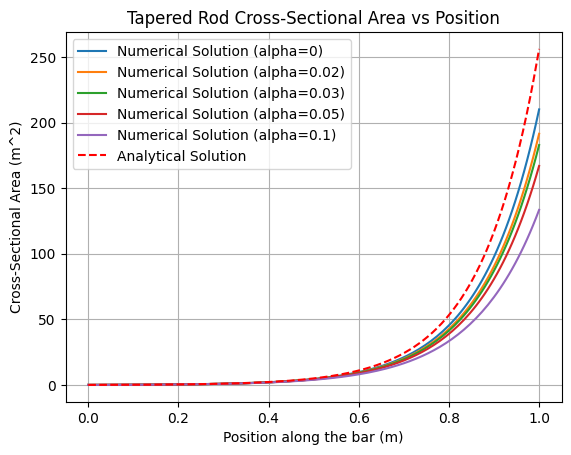

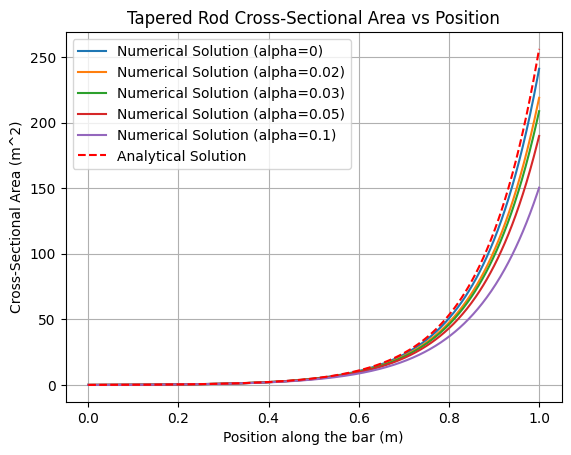

In [49]:
disks = [2, 10, 20, 100, 150, 500]
alpha = [0, 0.02, 0.03, 0.05, 0.1]

x_analytical = np.linspace(0, L_length, 500)
A0 = w0_initial_width * t0_initial_thickness
areas_analytical = analytical_area(x_analytical, A0, p_density, g_gravity, P_applied_force)

for s in disks:
    for a in alpha:
        x_positions, areas, disk_weights = compute_tapered_rod(
            P_applied_force,
            p_density,
            g_gravity,
            w0_initial_width,
            t0_initial_thickness,
            L_length,
            s,
            a
        )
        df = pd.DataFrame({
            'Position (m)': x_positions,
            'Area (m^2)': areas,
            'Disk Weight (N)': disk_weights
        })
    

        # plot the position vs area
        plt.plot(df['Position (m)'], df['Area (m^2)'], label=f'Numerical Solution (alpha={a})')
    plt.xlabel('Position along the bar (m)')
    plt.ylabel('Cross-Sectional Area (m^2)')
    plt.plot(x_analytical, areas_analytical, label='Analytical Solution', color='red', linestyle='--')
    
    plt.title('Tapered Rod Cross-Sectional Area vs Position')
    plt.legend()
    plt.grid()
    plt.show()




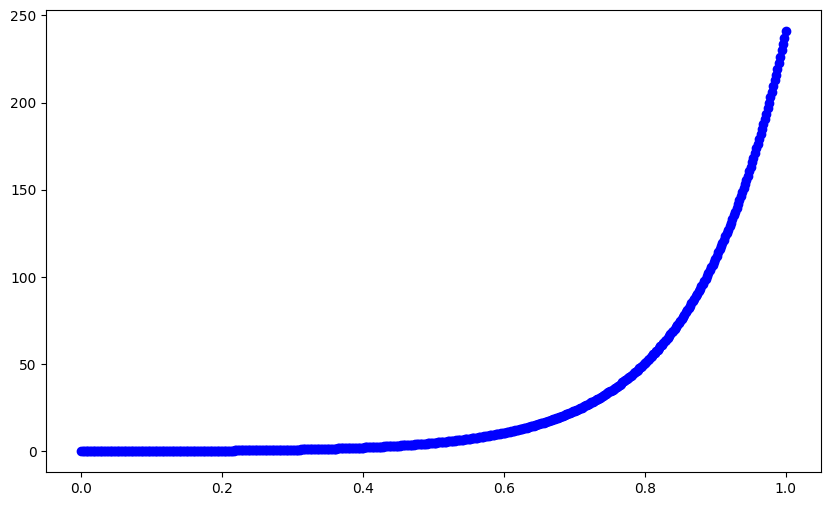

In [28]:
# generate matplotlib plot of the area vs position
plt.figure(figsize=(10, 6))
plt.plot(df['Position (m)'], df['Area (m^2)'], marker='o', label='Numerical Area', color='b')


A0 max analytical: 256.0607976250494
A0 max numerical: 240.91900530420173


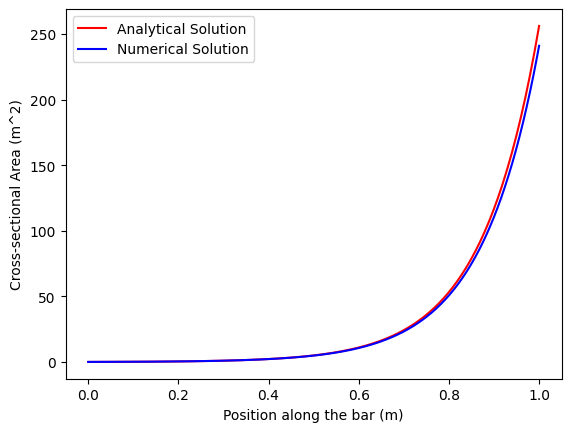

In [31]:
# plot analytical solution for comparison
x_analytical = np.linspace(0, L_length, 100)
A0 = w0_initial_width * t0_initial_thickness
areas_analytical = analytical_area(x_analytical, A0, p_density, g_gravity, P_applied_force)

print(f"A0 max analytical: {np.max(areas_analytical)}")
print(f"A0 max numerical: {np.max(df['Area (m^2)'])}")

plt.plot(x_analytical, areas_analytical, label='Analytical Solution', color='red')
plt.plot(df['Position (m)'], df['Area (m^2)'], label='Numerical Solution', color='blue')
plt.xlabel('Position along the bar (m)')
plt.ylabel('Cross-sectional Area (m^2)')

plt.legend()